# Домашнее задание "Центральная Предельная Теорема и Закон Больших Чисел".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
%matplotlib inline

Создайте случайную величину из любого выбранного вами распределения, для разных значений n сгенерируйте 1000 выборок размера n и постройте гистрограммы средних этих выборок.

In [12]:
rv = stats.expon(0.25)
sample = rv.rvs(size=1000)

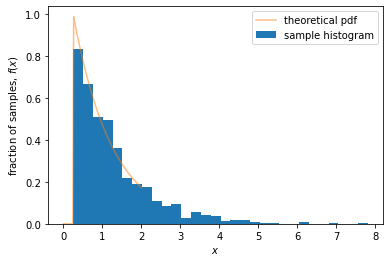

In [13]:
x = np.linspace(0,2,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [78]:
# Параметры запуска: размеры выборок и количество повторов генерации
sizes = [2, 10, 50, 500]

samples_count = 1000
# Массивы для сохранения средних по выборкам
total_means = []

for size_ in sizes:
    a = np.array([])
    for number in range(samples_count):
        # На каждом цикле генерируем выборки разных размеров
        sample1 = rv.rvs(size=size_)
        a = np.append(a, sample1.mean())
    #print(a.shape)
    total_means.append(a)
#total_means

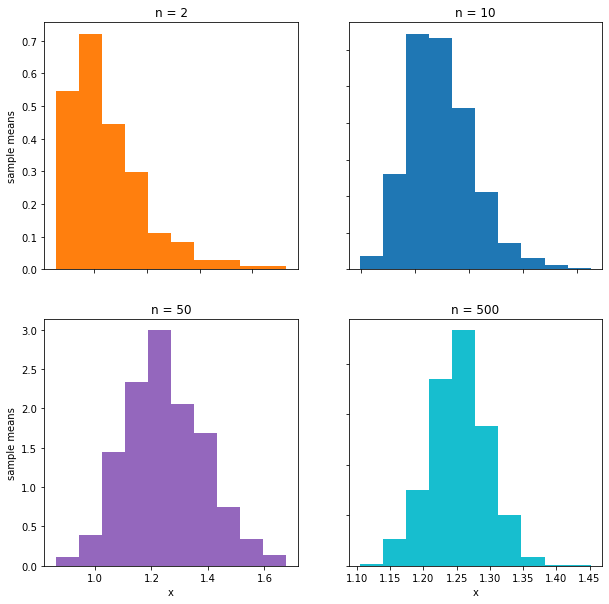

In [80]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].hist(total_means[0], density=True, color='tab:orange')
axs[0, 0].set_title('n = 2')
axs[0, 1].hist(total_means[1], density=True, color='tab:blue')
axs[0, 1].set_title('n = 10')
axs[1, 0].hist(total_means[2], density=True, color='tab:purple')
axs[1, 0].set_title('n = 50')
axs[1, 1].hist(total_means[3], density=True, color='tab:cyan')
axs[1, 1].set_title('n = 500')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='sample means')

for ax in axs.flat:
    ax.label_outer()

Как мы видим, при увеличении размера выборки распределение выборочных средних стремится к нормальному. При этом средние значения выборок стремятся к среднему значению популяции:

In [86]:
sample.mean() # среднее генеральной совокупности

1.2586120837994936

In [92]:
for i in range(4):
    print('n = {}'.format(sizes[i]))
    for j in range (5):
        print(total_means[i][j])

n = 2
0.5477020382430473
2.012971550787276
1.5615673075266259
4.132201386540707
1.5823267783039976
n = 10
0.8720692518057591
1.5901220273416352
1.5057445210777103
1.0128961920125419
0.8002470900333195
n = 50
1.1977995617640667
1.2340195348381484
1.4039718187152457
1.03781008704566
1.4811457282034266
n = 500
1.2624741892998168
1.288000207309282
1.2243835475126956
1.2173789693524764
1.2822231854017263


Кроме того, мы можем наблюдать, что стандартное отклонение выборочных средних стремится к значению $\frac{\sigma}{\sqrt(n)}$:

In [105]:
std = sample.std()
print('Стандартное отклонение генеральной совокупности: {}'.format(std))

Стандартное отклонение генеральной совокупности: 0.9811370239237184


In [107]:
for i in range(4):
    predicted_std = std / math.sqrt(sizes[i])
    real_std = total_means[i].std()
    print('Расчётное значение: {}'.format(predicted_std))
    print('Действительное значение: {}'.format(real_std))

Расчётное значение: 0.6937686428896491
Действительное значение: 0.7159007774506287
Расчётное значение: 0.3102627692318063
Действительное значение: 0.30430514365566946
Расчётное значение: 0.13875372857792984
Действительное значение: 0.14057799088438444
Расчётное значение: 0.04387778161470543
Действительное значение: 0.04300483266031512
